In [ ]:
#the statistics of the eclipse data

# Triaging time when approaching the next release

In [1]:
import pandas as pd
import os
import json
import csv
import re, datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
from lifelines.statistics import logrank_test
from lifelines import KaplanMeierFitter

from global_functions import *

In [2]:
from scipy import stats

def compare_distributions(tt,var1,var2,what): 
    
    normal_test_var1 = stats.kstest(tt[tt[what]==var1].triaging_time.values.tolist(), 'norm')
    normal_test_var2 = stats.kstest(tt[tt[what]==var2].triaging_time.values.tolist(), 'norm')
    
    #tt[[var1, var2]].plot(kind='box')
    
    #not normal distribution
    if normal_test_var1.pvalue<0.05 or  normal_test_var2.pvalue<0.05:
        print('At least one sample not normally distributed')
        #wilkoxon
        wresult = stats.ranksums(tt[tt[what]==var1].triaging_time, tt[tt[what]==var2].triaging_time)
        
        if wresult.pvalue<0.05:
            print('Statistically significant difference found for:'+var)
        else:
            print('Statistically significant difference NOT found for:'+var)
        print(wresult)
    else:
        print('Both samples are normally distributed')
        #t-test
        tresult = stats.ttest_rel(tt[tt[what]==var1].triaging_time, tt[tt[what]==var2].triaging_time)

        if tresult.pvalue<0.05:
            print('Statistically significant difference found for:'+var)
        else:
            print('Statistically significant difference NOT found for:'+var)
        print(tresult)
 

In [3]:
release_creation_ts_all = get_release_dates()

In [4]:
#load data
file_target_e = 'data'+os.sep+'RQ3'+os.sep+'time_assign_E_2.csv.gz'
df_total = pd.read_csv(file_target_e,index_col=False,compression='gzip',dtype={'release':str})
df_total['type']='itself'
df_total.head()

,id,month,triaging_time,release,type
0,64617,12,11,3.0,itself
1,64621,12,0,3.0,itself
2,64626,12,0,3.0,itself
3,64627,12,0,3.0,itself
4,64628,12,0,3.0,itself


In [5]:
#load data
file_target_e = 'data'+os.sep+'RQ3'+os.sep+'time_assign_E.csv.gz'
df_total2 = pd.read_csv(file_target_e,index_col=False,compression='gzip',dtype={'release':str})
#df_total2['release']=df_total2.apply(lambda x : predecessor(list(release_creation_ts_all.keys()),x['release']), axis=1)
df_total2['type']='predecessor'
df_total2.head()

,id,month,triaging_time,release,type
0,101046,12,0,3.1,predecessor
1,101423,12,0,3.1,predecessor
2,101428,12,0,3.1,predecessor
3,101447,12,0,3.1,predecessor
4,101634,12,0,3.1,predecessor


In [6]:
total=df_total2.append(df_total)
total.head()

,id,month,triaging_time,release,type
0,101046,12,0,3.1,predecessor
1,101423,12,0,3.1,predecessor
2,101428,12,0,3.1,predecessor
3,101447,12,0,3.1,predecessor
4,101634,12,0,3.1,predecessor


3.0


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


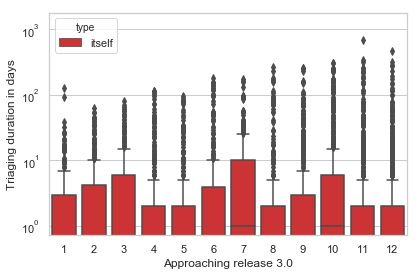

3.1


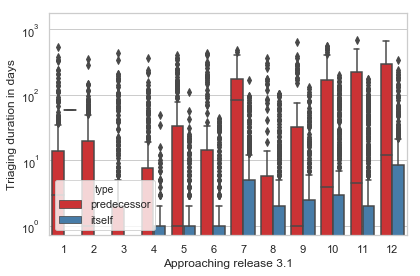

3.2


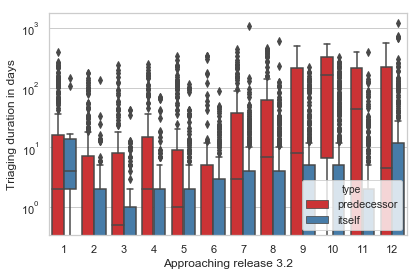

3.3


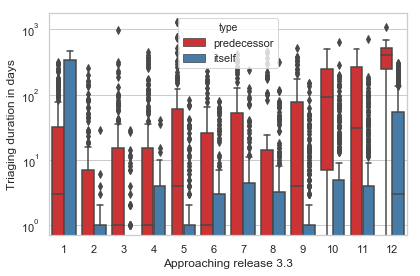

3.4


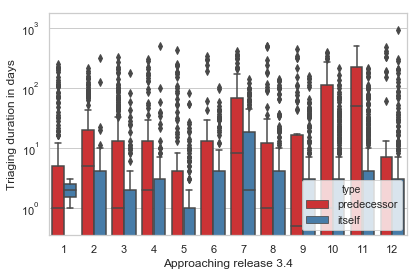

3.5


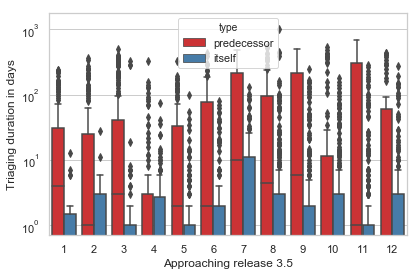

3.6


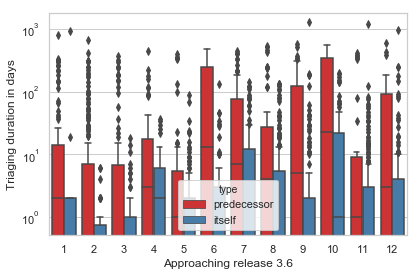

3.7


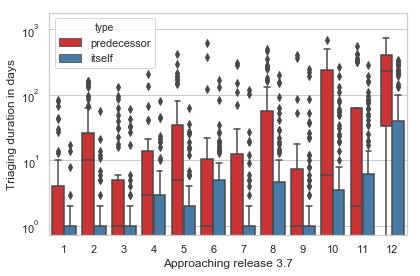

4.2


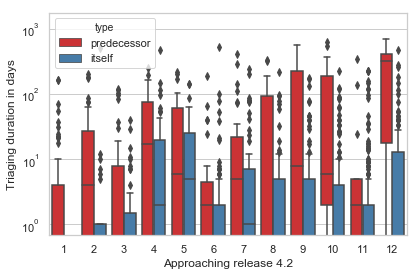

4.3


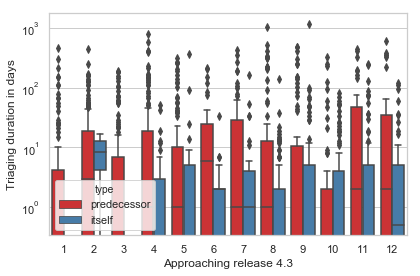

4.4


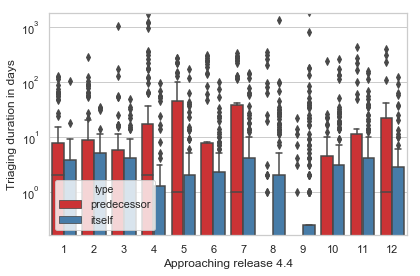

4.5


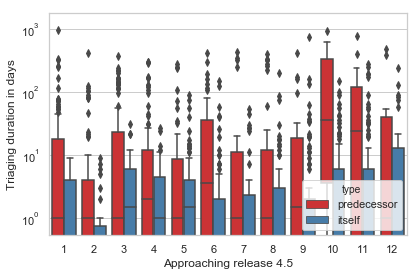

4.6


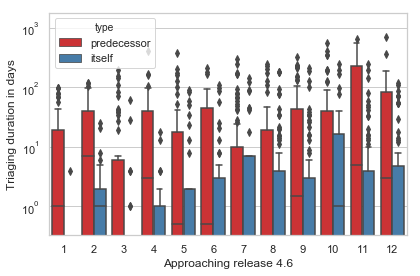

4.7


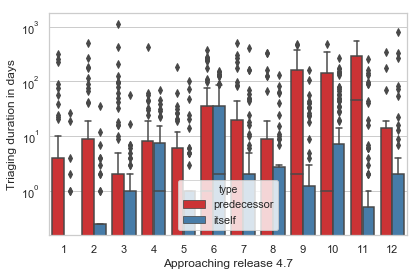

4.8


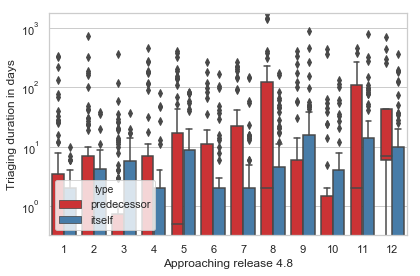

4.9


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


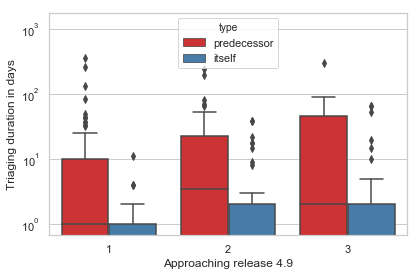

4.10


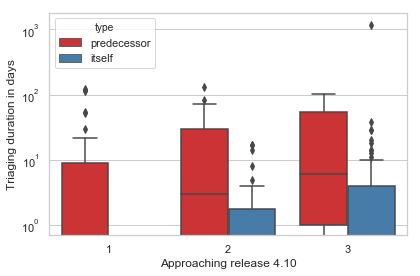

In [7]:
r_month=[10,11,12]

releases_only = total[['release']].drop_duplicates()
releases_only = sort_df(releases_only,'release')
releases_only = releases_only[['release']]

for release in releases_only.release.unique():
#release='4.3'
    release=str(release)
    if (release!='4.9') & (release!='4.10'):
        print(release)
        sns.set(style="whitegrid")
        draft=total[(total['release']==release) ]
        ax = plt.subplot(1, 1,1)
        
         
        sns.boxplot(x="month", y="triaging_time", hue="type",
              data=draft, palette="Set1")
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Triaging duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        
        plt.tight_layout( )
        plt.show()
        #ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'triagingRate_comp'+release.replace('.', '-')+'.pdf', bbox_inches="tight")
        
    else:
        print(release)
        sns.set(style="whitegrid")
        draft=total[(total['release']==release) & (total['month'].isin(r_month))]
        ax = plt.subplot(1, 1,1)  
        sns.boxplot(x="month", y="triaging_time", hue="type",
              data=draft, palette="Set1")
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Triaging duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        ax.set_xticklabels( ('1', '2','3') )

        plt.tight_layout( )
        plt.show()
        #ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'triagingRate_comp'+release.replace('.', '-')+'.pdf', bbox_inches="tight")            
#plt.savefig('rq3t4-4.pdf')

3.0


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


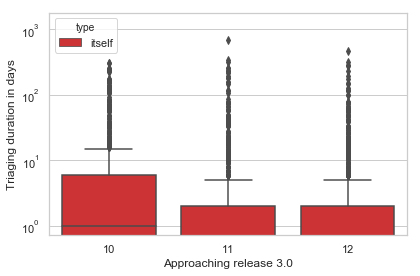

3.1


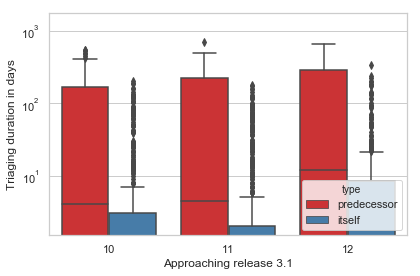

3.2


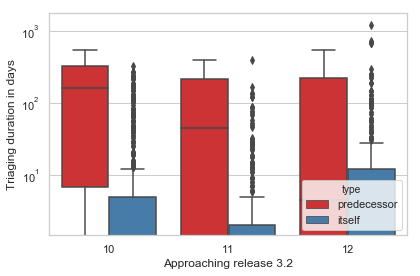

3.3


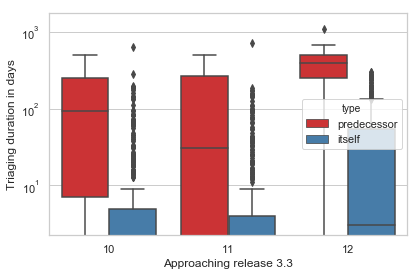

3.4


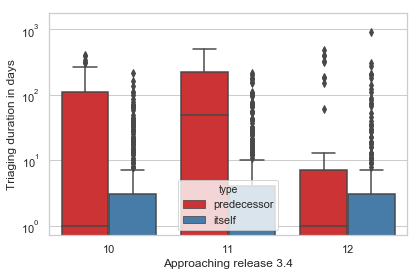

3.5


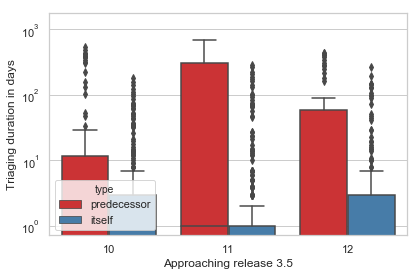

3.6


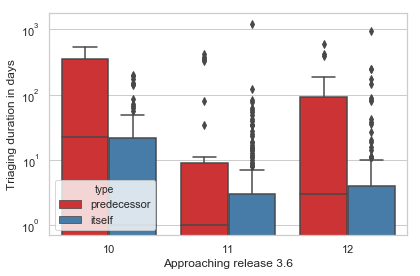

3.7


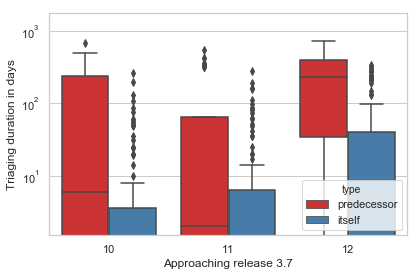

4.2


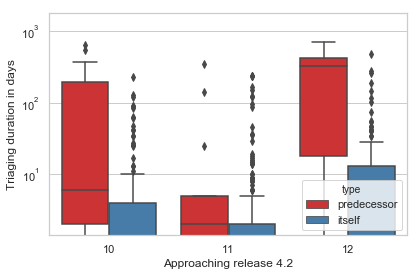

4.3


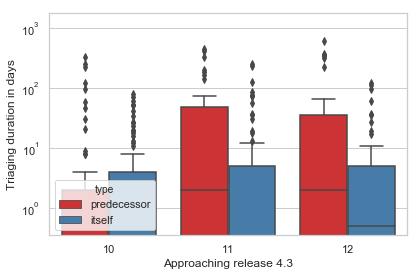

4.4


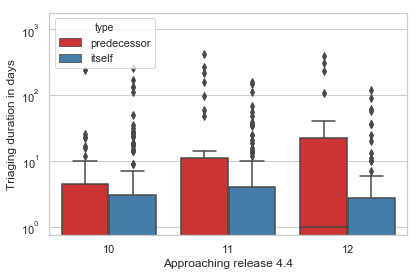

4.5


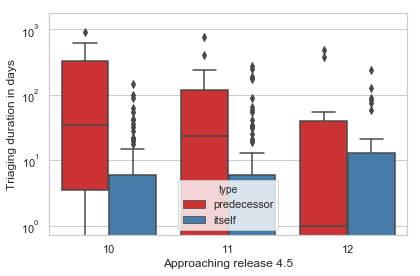

4.6


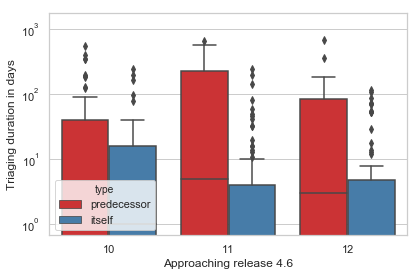

4.7


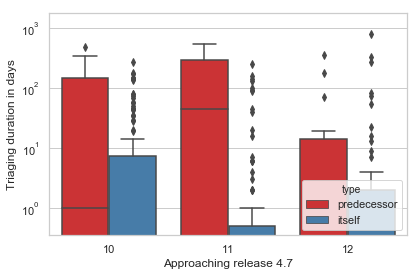

4.8


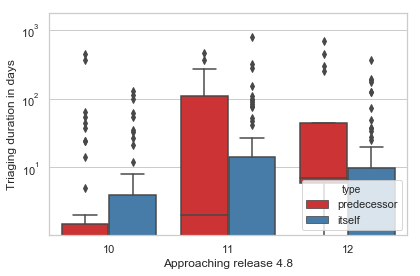

4.9


C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


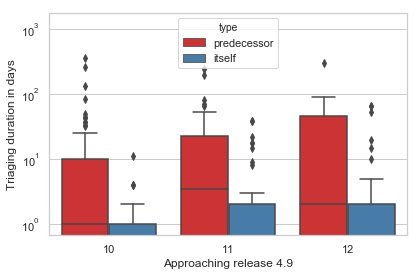

4.10


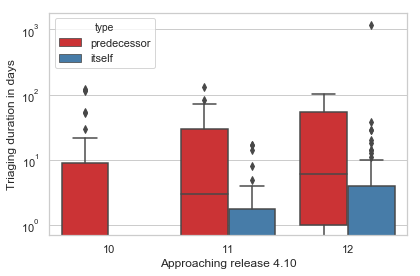

In [8]:
#show only the last three months
r_month=[10,11,12]

releases_only = total[['release']].drop_duplicates()
releases_only = sort_df(releases_only,'release')
releases_only = releases_only[['release']]

for release in releases_only.release.unique():
#release='4.3'
    release=str(release)
    if (release!='4.9') & (release!='4.10'):
        print(release)
        sns.set(style="whitegrid")
        draft=total[(total['release']==release) & (total['month'].isin([10,11,12]))  ]
        ax = plt.subplot(1, 1,1)
        
         
        sns.boxplot(x="month", y="triaging_time", hue="type",
              data=draft, palette="Set1")
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Triaging duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        
        plt.tight_layout( )
        plt.show()
        #ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'triagingRate_3mon'+release.replace('.', '-')+'.pdf', bbox_inches="tight")
        
    else:
        print(release)
        sns.set(style="whitegrid")
        draft=total[(total['release']==release) & (total['month'].isin(r_month))]
        ax = plt.subplot(1, 1,1)  
        sns.boxplot(x="month", y="triaging_time", hue="type",
              data=draft, palette="Set1")
        ax.set_xlabel("Approaching release "+release)
        ax.set_ylabel("Triaging duration in days")
        ax.set_yscale('log')
        ax.set_ylim(0, 1800)
        #ax.set_xticklabels( ('1', '2','3') )

        plt.tight_layout( )
        plt.show()
        #ax.get_figure().savefig('..'+os.sep+'paper'+os.sep+'figs'+os.sep+'RQ3'+os.sep+'triagingRate_3mon'+release.replace('.', '-')+'.pdf', bbox_inches="tight")            
#plt.savefig('rq3t4-4.pdf')

In [9]:
#get the three last months before a release
last_3months=total[total['month'].isin([10,11,12])]

In [10]:
#test if there is a statistical difference between triaging time for the current and next release in the last 3 months
var='triaging time for the current and next release in the last 3 months'
compare_distributions(last_3months,'predecessor','itself','type')

At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current and next release in the last 3 months
RanksumsResult(statistic=30.250112578707228, pvalue=5.199523969575445e-201)


In [11]:
#test if there is a statistical difference between triaging time for the current release in the last 3 months and first 9 months
last_3months=total[(total['month'].isin([10,11,12])) & (total['type']=='predecessor')]
last_3months['when']='last'
first_9months=total[(~total['month'].isin([10,11,12])) & (total['type']=='predecessor') ]
first_9months['when']='first'
tt=last_3months.append(first_9months)

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
var='triaging time for the current release in the last 3 months and first 9 months'
compare_distributions(tt,'first','last','when')


At least one sample not normally distributed
Statistically significant difference found for:triaging time for the current release in the last 3 months and first 9 months
RanksumsResult(statistic=-21.408383640820354, pvalue=1.1161723279285655e-101)


In [13]:
#test if there is a statistical difference for triaging time for the next release in the last 3 months and first 9 months

last_3months=total[(total['month'].isin([10,11,12])) & (total['type']=='itself')]
last_3months['when']='last'
first_9months=total[(~total['month'].isin([10,11,12])) & (total['type']=='itself') ]
first_9months['when']='first'
tt=last_3months.append(first_9months)

C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\zeinab\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [14]:
var='triaging time for the next release in the last 3 months and first 9 months'
compare_distributions(tt,'first','last','when')

At least one sample not normally distributed
Statistically significant difference found for:triaging time for the next release in the last 3 months and first 9 months
RanksumsResult(statistic=-6.435885047233473, pvalue=1.2275591371825288e-10)
